# Binary Logistic Regression
by Ben Royles

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Binary-Logistic-Regression" data-toc-modified-id="Binary-Logistic-Regression-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Binary Logistic Regression</a></span></li><li><span><a href="#Binary-Logistic-Regression" data-toc-modified-id="Binary-Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Binary Logistic Regression</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Baseline-Win/Loss-Prediction" data-toc-modified-id="Baseline-Win/Loss-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline Win/Loss Prediction</a></span></li><li><span><a href="#Manual-decision-boundary-selection" data-toc-modified-id="Manual-decision-boundary-selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manual decision boundary selection</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

df = pd.read_csv('complete.csv')
df.shape

(61845, 216)

In [2]:
df.columns.tolist()

['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'Match Week',
 'FullTimeResult',
 'DistanceTraveled in Km',
 'Weekday',
 'Month',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away',
 'Points before match_home',
 'Points before match_away',
 'League Position_home',
 'League Position_away',
 'Form_home',
 'Form_away',
 'AverageFullTimeGoalsFor_home',
 'AverageFullTimeGoalsFor_away',
 'AverageFullTimeGoalsAgainst_home',
 'AverageFullTimeGoalsAgainst_away',
 'AverageHalfTimeGoalsFor_home',
 'AverageHalfTimeGoalsFor_away',
 'AverageHalfTimeGoalsAgainst_home',
 'AverageHalfTimeGoalsAgainst_away',
 'AverageShots_home',
 'AverageShots_away',
 'AverageShotsAgainst_home',
 'AverageShotsAgainst_away',
 'A

Removing the non-numeric and descriptive columns from the dataframe. I have also elected to remove the stadium and distance data. This is because the data was only available for a small proportion of the leagues in the data set. Keeping it in would reduce the number of observations to around 21000.

In [3]:
df.drop(['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'Match Week',
 'DistanceTraveled in Km',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away'], axis=1, inplace=True)

In [4]:
df.dropna(inplace=True)
df.shape

(44565, 41)

# Data Prep

In [5]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [6]:
# Calculate the value counts of each class in y_train
value_counts = y_train.value_counts()

# Calculate the total number of samples in y_train
total_samples = len(y_train)

# Calculate the ratio (percentage) of each class in y_train
class_ratios = value_counts / total_samples

# Display the class ratios
print(class_ratios)

H    0.435929
A    0.301901
D    0.262170
Name: FullTimeResult, dtype: float64


In [7]:
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

import pandas as pd
from sklearn.model_selection import train_test_split

# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Drop all entries where FullTimeResult = 'D' from the training set
train_data = train_data[train_data['FullTimeResult'] != 'D']

# Split back into X_train and y_train
X_train = train_data.drop(columns='FullTimeResult')
y_train = train_data['FullTimeResult']

# Calculate the value counts of each class in y_train
value_counts = y_train.value_counts()

# Calculate the total number of samples in y_train
total_samples = len(y_train)

# Calculate the ratio (percentage) of each class in y_train
class_ratios = value_counts / total_samples

# Display the class ratios
print(class_ratios)

H    0.591426
A    0.408574
Name: FullTimeResult, dtype: float64


In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Baseline Win/Loss Prediction

In order to test whether manually choosing the decision boundaries for classification, I need a baseline to compare the results to.

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and fit the logistic regression model
model = LogisticRegression(C=0.001, random_state=42, max_iter=1000, multi_class='ovr')
model.fit(X_train_scaled, y_train)

# Calculate the accuracy of the model on the validation set
val_accuracy = model.score(X_validation_scaled, y_validation)
test_accuracy = model.score(X_test_scaled, y_test)

# Get the predicted probabilities for class 1 (positive class)
y_validation_pred_probs = model.predict_proba(X_validation_scaled)[:, 1]

# Combine predicted probabilities and true labels into a table
results_table = pd.DataFrame({'True Label': y_validation, 'Class 1 Probability': y_validation_pred_probs})

# Print the accuracy
print("Accuracy on the validation set:", val_accuracy)



Accuracy on the validation set: 0.49617212249208026


Predicting for just Home Wins and Away Wins scores equally to predicting Home Wins, Draws and Away Wins. 

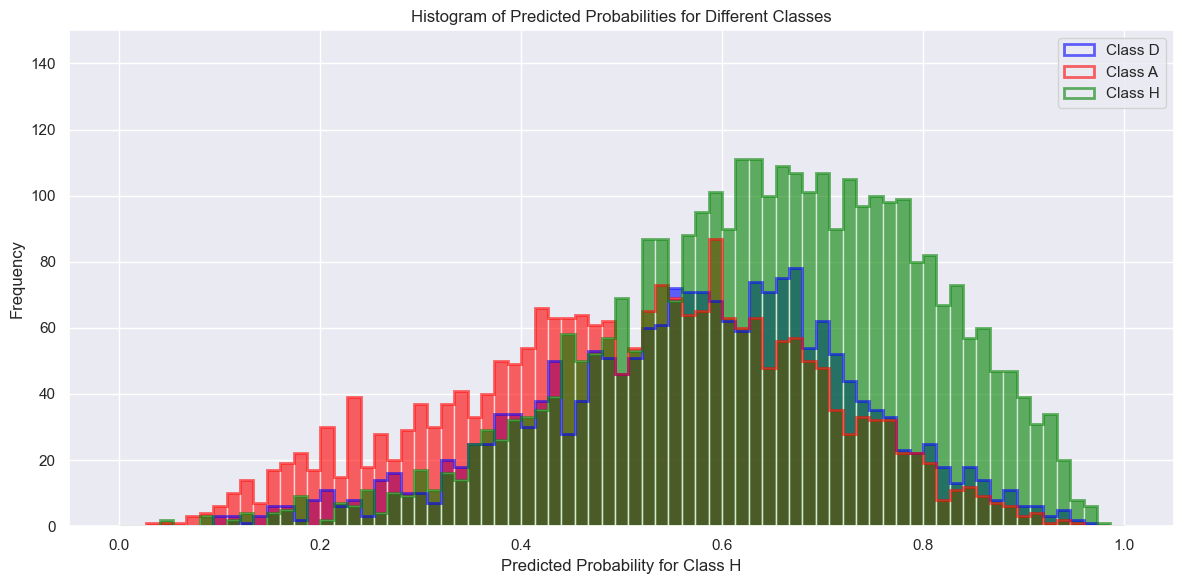

In [21]:
import matplotlib.pyplot as plt

# Plot histograms for each class on the same chart
classes = results_table['True Label'].unique()
fig, ax = plt.subplots(figsize=(12, 6))

colors = {'A': 'red', 'H': 'green', 'D': 'blue'}

for class_label in classes:
    class_probs = results_table[results_table['True Label'] == class_label]['Class 1 Probability']

    # Plot the outline with solid edge (alpha=1)
    ax.hist(class_probs, bins=75, color=colors[class_label], alpha=0.6, edgecolor=colors[class_label], linewidth=2, range=(0, 1), label=f'Class {class_label}', histtype='step')

    # Plot the fill color with transparency (alpha=0.6)
    ax.hist(class_probs, bins=75, color=colors[class_label], alpha=0.6, range=(0, 1))

ax.set_title('Histogram of Predicted Probabilities for Different Classes')
ax.set_xlabel('Predicted Probability for Class H')
ax.set_ylabel('Frequency')
ax.set_ylim(0, 150)
ax.legend()

plt.tight_layout()
plt.show()


As you can see from the probability distribution, there is a very large overlap between the classes. This illustrates the issues the model has in selecting the correct class. Currently, every value above 0.5 is classified as H with anything less being classified as A. This causes imbalanced results as it captures the majority of class H, very little of class A and none of class D.

C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


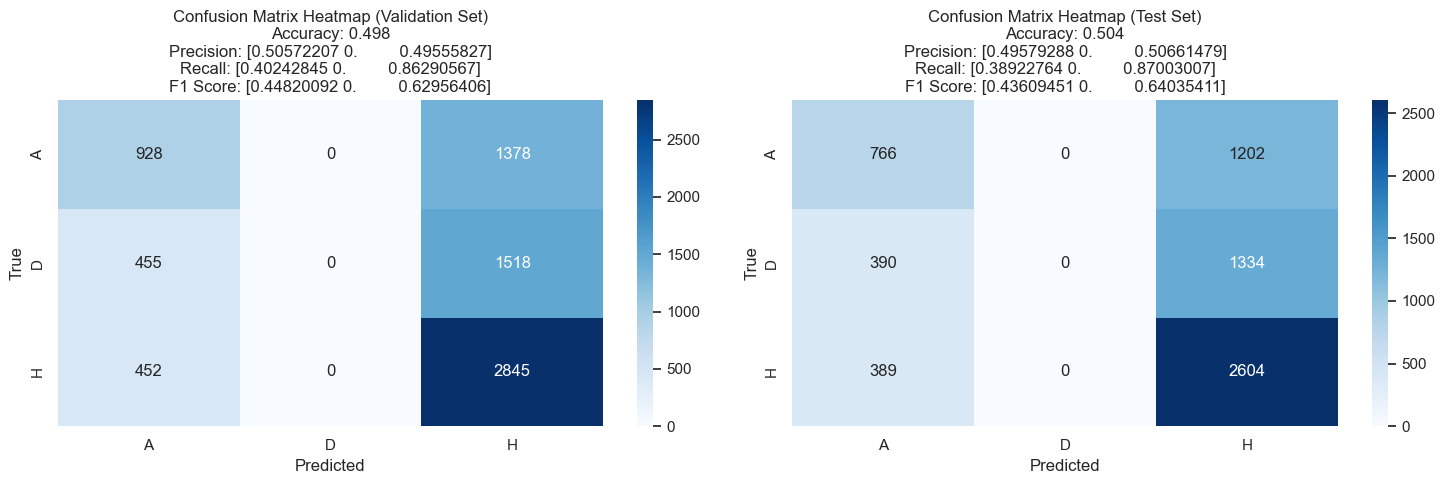

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the validation and test sets
y_pred_val = model.predict(X_validation_scaled)
y_pred_test = model.predict(X_test_scaled)

# Create confusion matrices
cm_val = confusion_matrix(y_validation, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate accuracy, precision, recall, and F1 score for the validation set
accuracy_val = accuracy_score(y_validation, y_pred_val)
precision_val = precision_score(y_validation, y_pred_val, average=None, labels=['A', 'D', 'H'])
recall_val = recall_score(y_validation, y_pred_val, average=None, labels=['A', 'D', 'H'])
f1_val = f1_score(y_validation, y_pred_val, average=None, labels=['A', 'D', 'H'])

# Calculate accuracy, precision, recall, and F1 score for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average=None, labels=['A', 'D', 'H'])
recall_test = recall_score(y_test, y_pred_test, average=None, labels=['A', 'D', 'H'])
f1_test = f1_score(y_test, y_pred_test, average=None, labels=['A', 'D', 'H'])

# Plot the confusion matrices as heatmaps
plt.figure(figsize=(15, 5))

# Validation Set
plt.subplot(1, 2, 1)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=['A', 'D', 'H'], yticklabels=['A', 'D', 'H'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Validation Set)\nAccuracy: {:.3f}\nPrecision: {}\nRecall: {}\nF1 Score: {}'.format(accuracy_val, precision_val, recall_val, f1_val))

# Test Set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['A', 'D', 'H'], yticklabels=['A', 'D', 'H'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Set)\nAccuracy: {:.3f}\nPrecision: {}\nRecall: {}\nF1 Score: {}'.format(accuracy_test, precision_test, recall_test, f1_test))

plt.tight_layout()
plt.show()

Looking at the confusion matrix we can see that the model over predicts class H, this results in only failing to classify around 1/6th of True H. As a result the model performs much worse on class A. As I set up and trained this model to be a binary classifier the model obviously misses all of the D class and doesn't predict any. I will now try and manually set the decision boundary to allow for some of class D to be predicted without reducing the accuracy on the other 2 classes.

# Manual decision boundary selection

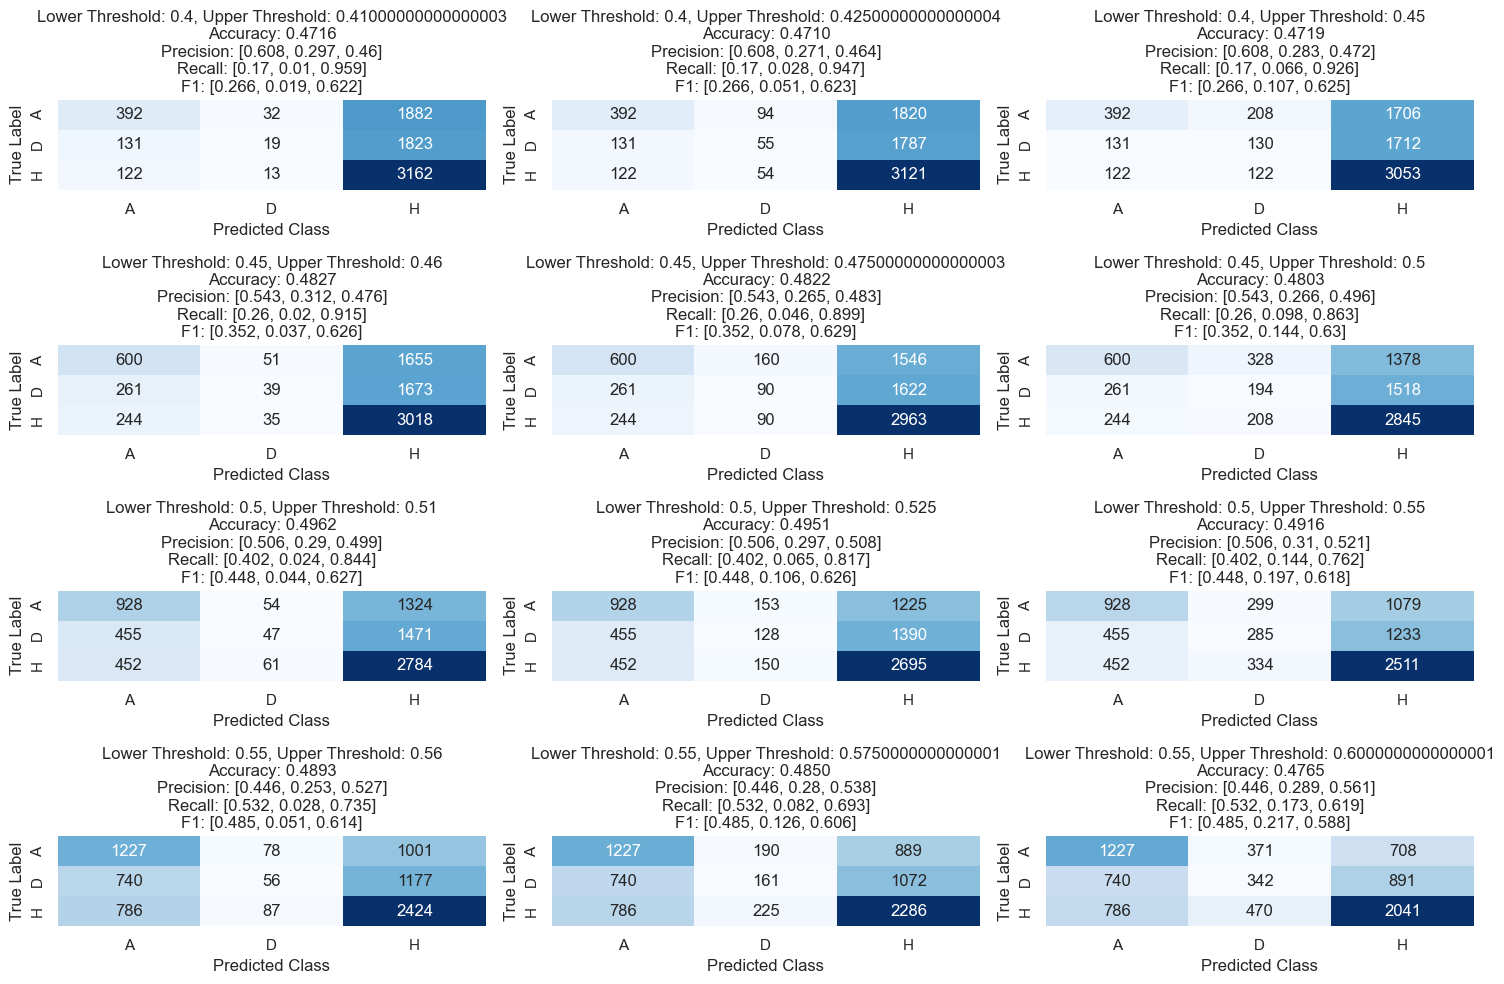

In [178]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and fit the logistic regression model
model = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get the predicted probabilities for class 1 (positive class)
y_validation_pred_probs = model.predict_proba(X_validation_scaled)[:, 1]

# Combine predicted probabilities and true labels into a table
results_table = pd.DataFrame({'True Label': y_validation, 'Class 1 Probability': y_validation_pred_probs})

# Define the range of gaps and thresholds you want to try
lower_thresholds = [0.4, 0.45, 0.5, 0.55]
gaps = [0.01, 0.025, 0.05]

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=len(lower_thresholds), ncols=len(gaps), figsize=(15, 10))

# Loop through different combinations of thresholds and gaps
for i, lower_threshold in enumerate(lower_thresholds):
    for j, gap in enumerate(gaps):
        upper_threshold = lower_threshold + gap
        
        # Map predicted values based on current thresholds and gap
        results_table['Predicted Class'] = 'D'  # Default class D for all
        results_table.loc[results_table['Class 1 Probability'] < lower_threshold, 'Predicted Class'] = 'A'
        results_table.loc[results_table['Class 1 Probability'] > upper_threshold, 'Predicted Class'] = 'H'
        
        # Calculate accuracy
        accuracy = accuracy_score(results_table['True Label'], results_table['Predicted Class'])
        
        # Calculate confusion matrix
        conf_matrix = confusion_matrix(results_table['True Label'], results_table['Predicted Class'], labels=['A', 'D', 'H'])
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['A', 'D', 'H'], columns=['A', 'D', 'H'])
        
        # Calculate precision and recall
        precision = precision_score(results_table['True Label'], results_table['Predicted Class'], average=None, labels=['A', 'D', 'H'])
        recall = recall_score(results_table['True Label'], results_table['Predicted Class'], average=None, labels=['A', 'D', 'H'])
        F1 = f1_score(results_table['True Label'], results_table['Predicted Class'], average=None, labels=['A', 'D', 'H'])
        
        # Round precision and recall to 3 significant figures
        precision = [round(p, 3) for p in precision]
        recall = [round(r, 3) for r in recall]
        F1 = [round(f, 3) for f in F1]
        
        # Plot confusion matrix
        sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i, j])
        axes[i, j].set_title(f'Lower Threshold: {lower_threshold}, Upper Threshold: {upper_threshold}\nAccuracy: {accuracy:.4f}\nPrecision: {precision}\nRecall: {recall}\nF1: {F1}')
        axes[i, j].set_xlabel('Predicted Class')
        axes[i, j].set_ylabel('True Label')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


Despite trying multiple iterations to include D in the predicted classes, there is no improvement in accuracy overall. Increasing the number of predictions for class D simply reduces the number of successful predictions of the other classes. However, depending on the specific use cases, certain iterations may be more useful and precision and recall do change significantly across different models. One example in betting, as having a higher degree of precision is more likely to be of benefit as you may only bet on one game out of hundreds and want to have a good chance of being right when you do.


